In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
train = pd.read_csv('new_train.csv')

In [3]:
train.head()

,Age,Channel_of_Recruitment,Division,Foreign_schooled,Gender,Last_performance_score,Marital_Status,No_of_previous_employers,Past_Disciplinary_Action,Previous_Award,Previous_IntraDepartmental_Movement,Promoted_or_Not,Qualification,State_Of_Origin,Targets_met,Training_score_average,Trainings_Attended,Years_on_job
0,33,Direct Internal process,Commercial Sales and Marketing,No,Female,12.5,Married,0,No,0,No,0,"MSc, MBA and PhD",ANAMBRA,1,41,2,8
1,28,Agency and others,Customer Support and Field Operations,Yes,Male,12.5,Married,0,No,0,No,0,First Degree or HND,ANAMBRA,0,52,2,4
2,32,Direct Internal process,Commercial Sales and Marketing,Yes,Male,7.5,Married,0,No,0,No,0,First Degree or HND,KATSINA,0,42,2,7
3,37,Agency and others,Commercial Sales and Marketing,Yes,Male,2.5,Single,1,No,0,No,0,First Degree or HND,NIGER,0,42,3,10
4,29,Direct Internal process,Information and Strategy,Yes,Male,7.5,Married,1,No,0,No,0,First Degree or HND,AKWA IBOM,0,77,3,7


In [4]:
train.shape

(38312, 18)

This train data has been cleaned up from the Handling Missing Data notebook so it has no missing values 

In [5]:
train.isnull().sum()

Age                                    0
Channel_of_Recruitment                 0
Division                               0
Foreign_schooled                       0
Gender                                 0
Last_performance_score                 0
Marital_Status                         0
No_of_previous_employers               0
Past_Disciplinary_Action               0
Previous_Award                         0
Previous_IntraDepartmental_Movement    0
Promoted_or_Not                        0
Qualification                          0
State_Of_Origin                        0
Targets_met                            0
Training_score_average                 0
Trainings_Attended                     0
Years_on_job                           0
dtype: int64

In [6]:
train.dtypes

Age                                      int64
Channel_of_Recruitment                  object
Division                                object
Foreign_schooled                        object
Gender                                  object
Last_performance_score                 float64
Marital_Status                          object
No_of_previous_employers                object
Past_Disciplinary_Action                object
Previous_Award                           int64
Previous_IntraDepartmental_Movement     object
Promoted_or_Not                          int64
Qualification                           object
State_Of_Origin                         object
Targets_met                              int64
Training_score_average                   int64
Trainings_Attended                       int64
Years_on_job                             int64
dtype: object

In [7]:
train[['Previous_Award', 'Promoted_or_Not', 'Targets_met']] = train[['Previous_Award', 'Promoted_or_Not', 'Targets_met']].astype('object')

These three columns contain only binary values and are best treated as categorical.

In [8]:
categorical_columns = list(train.select_dtypes(include=['object']).columns)
categorical_columns.remove('Promoted_or_Not')

numerical_columns = list(train.select_dtypes(exclude=['object']).columns)

In [9]:
print("Categorical columns: {}".format(len(categorical_columns)))

print("Numerical columns: {}".format(len(numerical_columns)))

Categorical columns: 12
Numerical columns: 5


In [10]:
numerical_columns

['Age',
 'Last_performance_score',
 'Training_score_average',
 'Trainings_Attended',
 'Years_on_job']

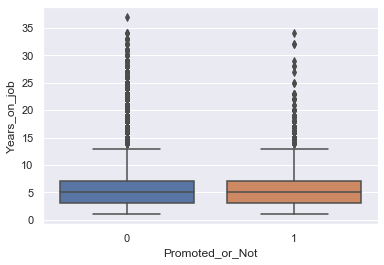

In [11]:
sns.boxplot(x='Promoted_or_Not', y='Years_on_job', data=train)

One thing that boxplots show is how a category possibly separates classes. Here, the 0-Class and 1-Class of target share a interquartile class. This is definitely not the most informative column. Plotting feature importances of a tree model will bring further insight.

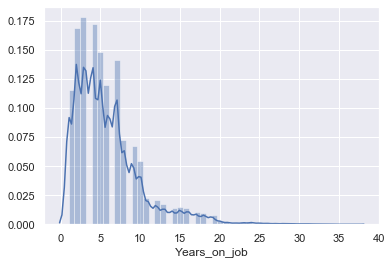

In [12]:
sns.distplot(train['Years_on_job'])

It might be best to use a log transformation for this column because of its skew.

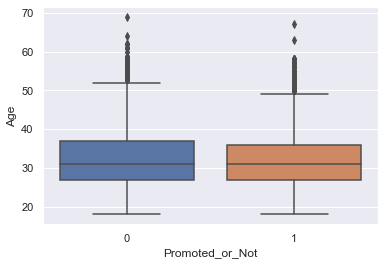

In [13]:
sns.boxplot(x='Promoted_or_Not', y='Age', data=train)

Here, there is slight separation of the classes. It's not so much that it can draw excitement however. 

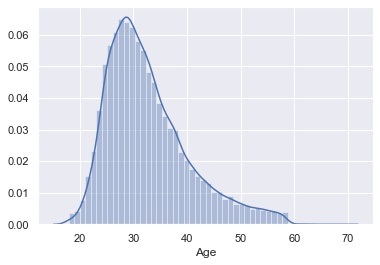

In [14]:
sns.distplot(train['Age'])

Well, this is close to normlly distributed so it is possible to apply the Z-Scaler. 

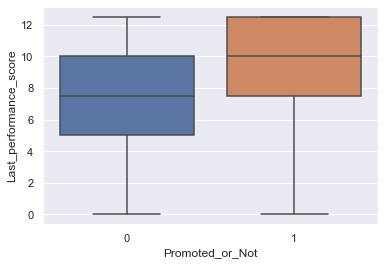

In [15]:
sns.boxplot(x='Promoted_or_Not', y='Last_performance_score', data=train)

Finaly some excitement. There is still some overlap from the classes but there is a clear enough distinction. Better than previous columns.

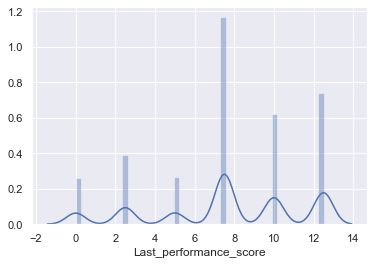

In [16]:
sns.distplot(train['Last_performance_score'])

Perhaps this column is best treated as categorical. The peformance scores appear to have been standardised to chosen scores. 

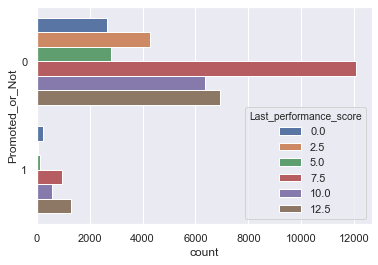

In [17]:
sns.countplot(y="Promoted_or_Not", hue="Last_performance_score", data=train)

Plotting the column this way reveals somethign interesting. More staff with performance score 12.5 are being promoted. The exact ratio is something to check later on. 

In [18]:
train.groupby(['Last_performance_score', 'Promoted_or_Not']).apply(lambda x: x.count()).iloc[:, 0].unstack()

Promoted_or_Not,0,1
Last_performance_score,,
0.0,2659,246
2.5,4266,59
5.0,2806,138
7.5,12059,934
10.0,6367,565
12.5,6914,1299


This dataframe confirms it. And it is intuitive that staff with higher performance score should get promoted. 

Something intersting is going on with staff with 0.0 Performance Score being promoted. 

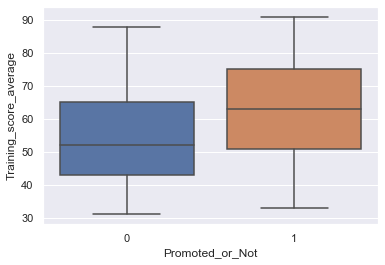

In [19]:
sns.boxplot(x='Promoted_or_Not', y='Training_score_average', data=train)

This also shows some separation of the classes. There is some overlap but it gives us something. 

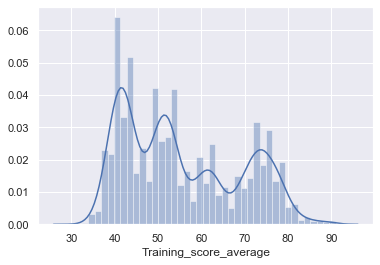

In [20]:
sns.distplot(train['Training_score_average'])

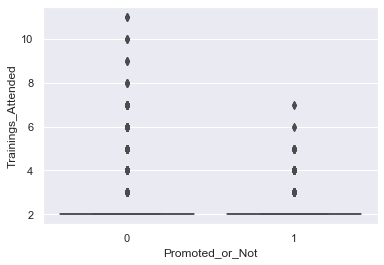

In [21]:
sns.boxplot(x='Promoted_or_Not', y='Trainings_Attended', data=train)

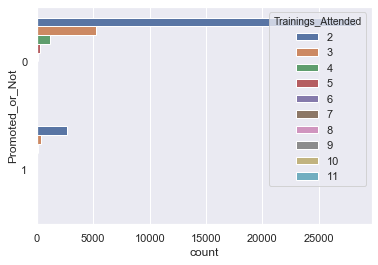

In [22]:
sns.countplot(y="Promoted_or_Not", hue="Trainings_Attended", data=train)

In [23]:
train['Trainings_Attended'].value_counts()

2     30981
3      5631
4      1244
5       316
6        93
7        28
8         6
10        5
11        4
9         4
Name: Trainings_Attended, dtype: int64

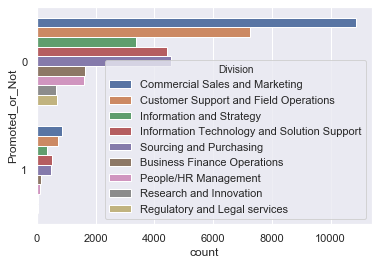

In [24]:
sns.countplot(y="Promoted_or_Not", hue="Division", data=train)

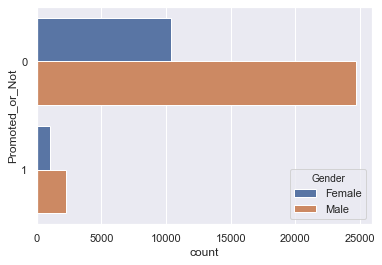

In [25]:
sns.countplot(y="Promoted_or_Not", hue="Gender", data=train)

The graph above shows that more Male Staff are promoted. More Male Staff are also not promoted. Are male staff more likely to be promoted than Female Staff? A simple function can help answer questions like this.

In [26]:
def bias_checker(data, column, target="Promoted_or_Not", ascending=False, relative=True):
    
    """To check if there is a bias towards a particular 
    category 
    
    data - dataframe to be checked for bias
    column - column to be checked. Must be categorical
    ascending - whether to sort present in ascending or descending order
    relative - whether or not to divide by largest values
    
    Interpretation
    Category x assigned 0.15 values means that there is 
    a 15% chance of being promoted if a staff belongs to 
    this category
    
    If relative is true, then values assigned to categories are relative to 
    the category assigned 1.0. In such case, if a category is assigned as value 
    of 0.15 then they are only 15% as likely to get a promotion as the reference 
    category"""
    
    temp = data.groupby([column, target]).apply(lambda x: x.count()).iloc[:, 0].unstack()
    temp = temp.div(temp.sum(axis=1), axis=0)
    temp = temp.loc[:, 1]
    if relative:
        temp = temp / temp.max()
    temp = temp.sort_values(ascending=ascending)
    temp.rename('Promoted', inplace=True)
    
    return temp

In [27]:
for col in categorical_columns:
    print(bias_checker(train, col, relative=True), "\n")

Channel_of_Recruitment
Referral and Special candidates    1.000000
Agency and others                  0.694877
Direct Internal process            0.685802
Name: Promoted, dtype: float64 

Division
Information Technology and Solution Support    1.000000
Sourcing and Purchasing                        0.900979
Information and Strategy                       0.870540
Customer Support and Field Operations          0.821902
Business Finance Operations                    0.760922
Commercial Sales and Marketing                 0.669368
Research and Innovation                        0.575080
People/HR Management                           0.529872
Regulatory and Legal services                  0.520654
Name: Promoted, dtype: float64 

Foreign_schooled
Yes    1.000000
No     0.962661
Name: Promoted, dtype: float64 

Gender
Female    1.00000
Male      0.92872
Name: Promoted, dtype: float64 

Marital_Status
Not_Sure    1.000000
Married     0.790893
Single      0.760525
Name: Promoted, dtype: float64

In [28]:
bias_checker(train, 'Last_performance_score', relative=True)

Last_performance_score
12.5    1.000000
0.0     0.535404
10.0    0.515327
7.5     0.454496
5.0     0.296370
2.5     0.086250
Name: Promoted, dtype: float64

This bias checker is interesting. It is checking how likely staff are to be promoted based on categories that they belong to.

Targets Met is definitely an interesting column. Staff are about 5 times more likely to be promoted if they meet their target. 
Previous Award is also interesting. Staff are more than 6 times more likely to be promoted if they have previous awards.

## Correlation Matrices

Text(0.5, 1, 'Correlation Matrix')

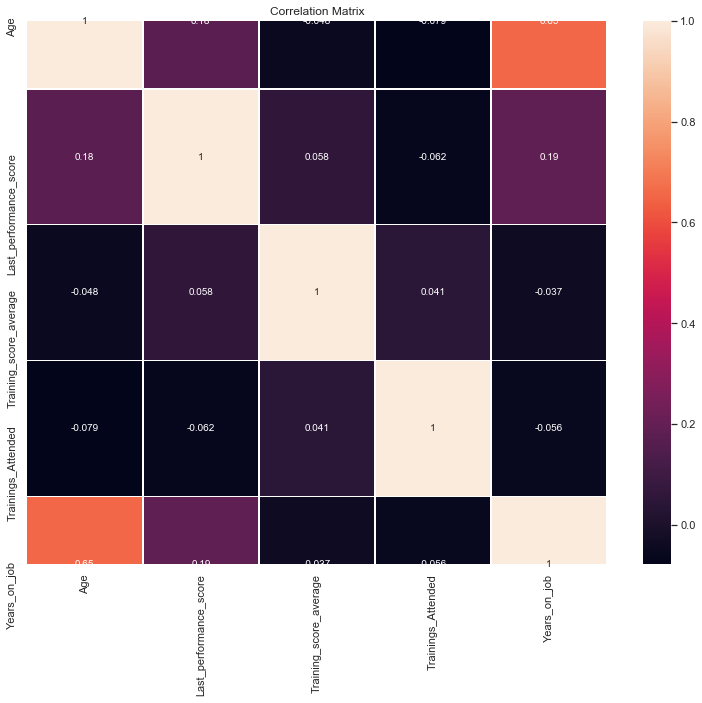

In [30]:
#Correlation netw
fig, axes = plt.subplots(figsize=(13, 10))
sns.heatmap(train.corr(), linewidths=0.5, ax=axes, annot=True)
axes.set_title('Correlation Matrix')

There is no serious correlation here so there is no danger of multicollinearity. 

Age and Years on Job show a high positive correlation - 0.65